<a href="https://colab.research.google.com/github/Kggzzz/Multivaririate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis



#Factor Analysis



In [1]:
import pandas as pd 

https://vincentarelbundock.github.io/Rdatasets/datasets.html

ข้อมูล psych 25 Personality items representing 5 factors (ลักษณะ บุคลิกภาพ )

In [2]:
BFI_data = pd.read_csv('bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


note : 
Factor Analysis Assumption : สิ่งที่เก็บข้อมูลมาแบบ Observe Variable เพื่อไปเป็น Factor Analysis ที่มีตัวแปรอยู่เบื้องหลังของผลนั้น โดยจุดประสงค์คือเราต้องการหาตัวแปรเบื้องหลังที่มีอิทธิพลต่อ factor analysis 

## Factor Analysis'

## Assumptions: 

ในข้อมูล multivariate ที่มีตัวแปร Observe Variables จำนวน n ตัว

มีตัวแปร Factors (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k < n

; k ที่น้อยกว่า n เพื่อทำให้เราสามารถลดตัวแปรที่ไม่จำเป็นออกได้

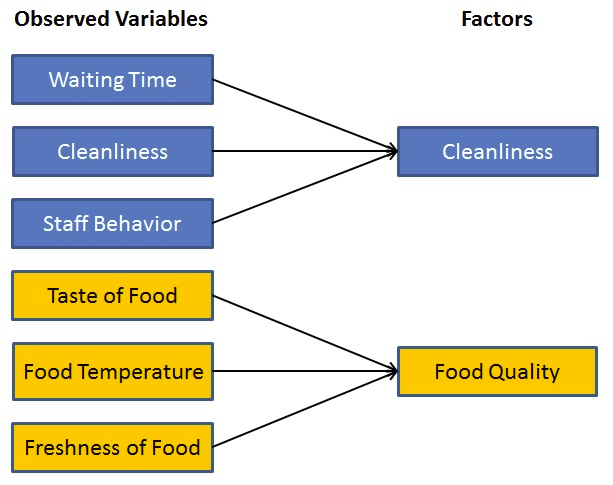



##Assumption ในการทำ Factor Analysis : 


1.   there are no outliers in data : ต้องไม่มี outliers เพื่อจะให้ค่าไม่ผิดเพี้ยนไป 
2.   Sample size should be greater than the factor : จำนวน data ต้องน้อยว่า จำนวน Factor Analysis
3.   There should not be prefact multicollonearity : เช่น การหา correlation จะได้เท่ากับ 1 หรือ plot กราฟจะได้เป็นเส้นตรง ต้องไม่มีค่าแบบนี้ 
4.   There should not be homoscedasticity : เช่น ตัวข้อมูลที่มีการกระจายคล้ายๆกัน เป็นกลุ่มที่อยู่ใกล้ๆกัน ความ error ของข้อมูลอยู่ในกรอบเดียวกัน ต้องไม่มีค่าแบบนี้ 

ซึ่งจาก Assumption เราสามารถใช้เครื่องมือในการทำได้เลย 


Factor Analysis มีประโยชน์หลักอยู่ 2 อันคือ 

1. Confirmatory : เช่น เราจัดกรุ๊ปข้อมูลไว้ แล้วเมื่อทำ fa แล้วกรุ๊ปยังอยู่แบบเดิม แสดงว่าสามารถยืนยันได้ว่า group ที่เราจัดนั้นเป็นจริง 
2. Exploratory : เป็นการหาตัวแปรที่ซ่อนอยู่ในชุดข้อมูล สามารถอธิบายอะไรได้บ้าง 

ที่ช่วยในการอธิบายทฤษฎี หรือสมมติฐานที่เราต้องการู้ได้ โดยดูจากความสัมพันธ์ของแต่ละตัวแปร ว่ามี factor ไหนอธิบายได้บ้าง 



แก้ error ```ModuleNotFoundError: No module named 'factor_analyzer'``` โดย https://stackoverflow.com/questions/61830329/modulenotfounderror-no-module-named-factor-analyzer-python-notebook

In [3]:
!pip install factor_analyzer #ถ้าเกิดเราใช้ libary ที่ไม่ได้มีคนใช้บ่อย เราจะต้องทำการติดตั้งเอง
import matplotlib.pyplot as plt  

     |████████████████████████████████| 40kB 2.8MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp37-none-any.whl size=40383 sha256=12499d4b986e5f5a748106ff6fa3e860e86b23d749a4cf184c90ce9dd656707c
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


In [4]:
from factor_analyzer import FactorAnalyzer #เมื่อติดตั้งแล้วก็จะดึง มาใช้ได้ตามปกติ 

การ .drop เช่น ```df.drop(['gender', 'education', 'age'],axis=1,inplace=True)``` โดย inplace คือการอัพเดตข้อมูลลงไปเลย  

#Quiz 5 ตัดตารางโดยใช้ .iloc 

In [5]:
BFI_data_dropped = BFI_data.iloc[:,1:-3] #.iloc[:,1:26] 
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


1.   there are no outliers in data : ต้องไม่มี outliers เพื่อจะให้ค่าไม่ผิดเพี้ยนไป

เราจึงต้องเอาค่าว่างออกไป โดยการใช้ .dropna()

In [6]:
BFI_data_dropped2 = BFI_data_dropped.dropna()

In [7]:
BFI_data_dropped.shape

(2800, 25)

In [8]:
BFI_data_dropped2.shape

(2436, 25)

3.   There should not be prefact multicollonearity : เช่น การหา correlation จะได้เท่ากับ 1 หรือ plot กราฟจะได้เป็นเส้นตรง ต้องไม่มีค่าแบบนี้

##Bartlett’s test

pacget ที่เกี่ยวกับตัวสถิติ เพื่อให้ง่ายต่อการคำนวณ

In [9]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity #import fuction calculate_bartlett_sphericity เพื่อนำมาใช้ 

เราสามารถดูได้ว่า ถ้า p-value เท่ากับ 0 แสดงว่า data ที่เรามีไม่มี prefact multicollonearity

In [10]:
chi_square_value,p_value=calculate_bartlett_sphericity(BFI_data_dropped2)
chi_square_value, p_value #จะบอกค่าว่ามี chi_square เท่าไหร่ p_value

(18170.966350869243, 0.0)

4.   There should not be homoscedasticity : เช่น ตัวข้อมูลที่มีการกระจายคล้ายๆกัน เป็นกลุ่มที่อยู่ใกล้ๆกัน ความ error ของข้อมูลอยู่ในกรอบเดียวกัน ต้องไม่มีค่าแบบนี้

##Kaiser-Meyer-Olkin (KMO) Test



In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo

โดยเมื่อเรารันค่า KMO แล้วมีค่าน้อยกว่า 6 แสดงว่าเราไม่สามารถใช้ข้อมูลนี้ได้  และมีค่าสูง ยิ่งดี 

In [12]:
kmo_all,kmo_model=calculate_kmo(BFI_data_dropped2)

In [13]:
kmo_model

0.8485397221949221

#Start Factors analysis

Choosing the Number of Factors 

Import

In [14]:
from factor_analyzer import FactorAnalyzer

Define 

In [15]:
fa = FactorAnalyzer(n_factors=20)

In [16]:
data_fa = fa.fit_transform(BFI_data_dropped2)
#fit คำนวนพารามิเตอร์ 
#tranfrom เป็นการนำ data ที่คำนวณมาแล้วเข้าไปใส่ในแกนที่ถูกเปลี่ยน

In [17]:
data_fa.shape

(2436, 20)

In [18]:
ev,v = fa.get_eigenvalues() #คำนวณหา eigenvalues เพื่อนำไป plot ในกราฟ Scree plot 

วิธีตัดสินว่าเราจะลดเหลือกี่ Dimention (มี factors ทั้งหมดกี่ตัว)

In [19]:
ev 

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

Scree plot เป็นกราฟที่บอกว่า factor แต่ละตัวมี eigenvalues อยู่เท่าไหร่ 

โดยการทำ Scree plot เพื่อมาดู factor ที่มากว่า 1 แล้วจะนำ factor นั้นมาใช้ 

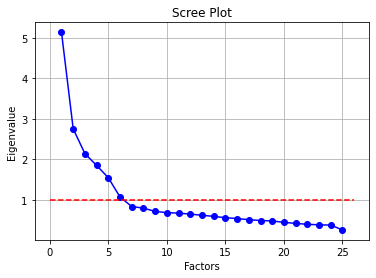

In [20]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped2.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped2.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [21]:
data_fa[:,:6] #ที่เป็น 6 ตัวเพราะ ตัวที่ 1-6 มีค่ามากกว่า 1 

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

##Factor Loading 

In [22]:
fa.loadings_.shape

#เป็นการบอกว่ามีกี่ตัวแปร แล้วดูตัวแปรไหนมีอิทธิพลบ้าง

(25, 20)

รัน Factor Analysis อีกรอบด้วย paremeters เท่ากับ 6 (โดยไม่เอาจำนวน paremeters เยอะเหมือนตอนแรกแล้ว)

In [26]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa2 = fa2.fit_transform(BFI_data_dropped2) 

จากรูป คือการหา factor analysis เป็นการหาตัวแปรที่ซ่อนอยู่ในชุดข้อมูลที่สามารถอธิบายค่าผิดปกติของข้อมูลได้ (ที่เราสังเกต)

เช่น ค่าติดลบในชุดข้อมูลนี้ ในแถว E1 เป็นค่าที่เราสังเกตได้ เราจึงหาตัวแปร 

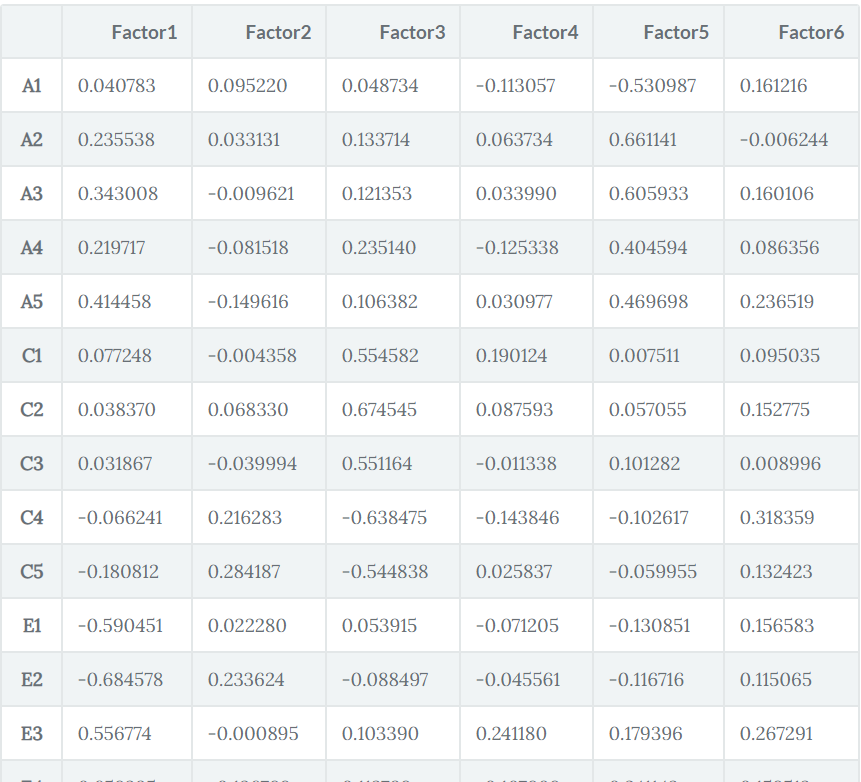

ทำการ Plot factor loadings

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

###matrix plot
confirmatory สามารถทำได้ดีเมื่อเรารู้ว่าตัวแปรไหนอยู่ในกลุ่มเดียวกันบ้าง 

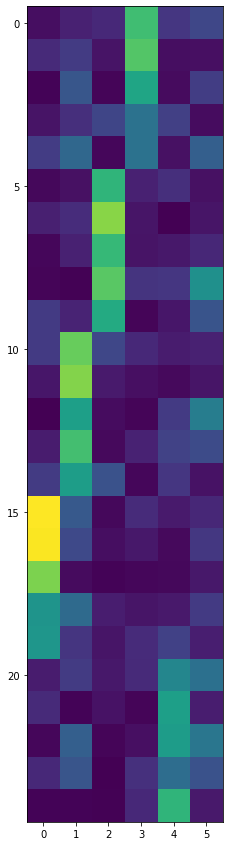

In [28]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

#กราฟนี้จะบอกว่า ค่าที่มีค่ามาก สีในกราฟก็จะสว่าง 
#โดยแกน y คือ factor ที่อธิบายค่าตัวที่ 1 ,2 ,3 ,... ไปเรื่อยๆ
#โดนแกน x คือ ข้อมูลตัวที่ 1 ,2 ,3 ,... ไปเรื่อยๆ
#ส่วนค่าในช่วงที่เป้นสีคือค่าของ factor loading 

###Bar plot กราฟแท่ง
Exploratory สามารถทำได้ดีในตอนที่เราไม่รู้ว่าตัวแปรใดอยู่ในกลุ่มเดียวกันบ้าง 

In [29]:
BFI_data_dropped2.columns #เรียกดู columns ก่อน 

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

เราเลือกมา 1 factor เพื่อนำค่าในกราฟข้างบนมา plot เป็น Bar เพื่อให้ดูค่าง่ายขึ้น 

<BarContainer object of 25 artists>

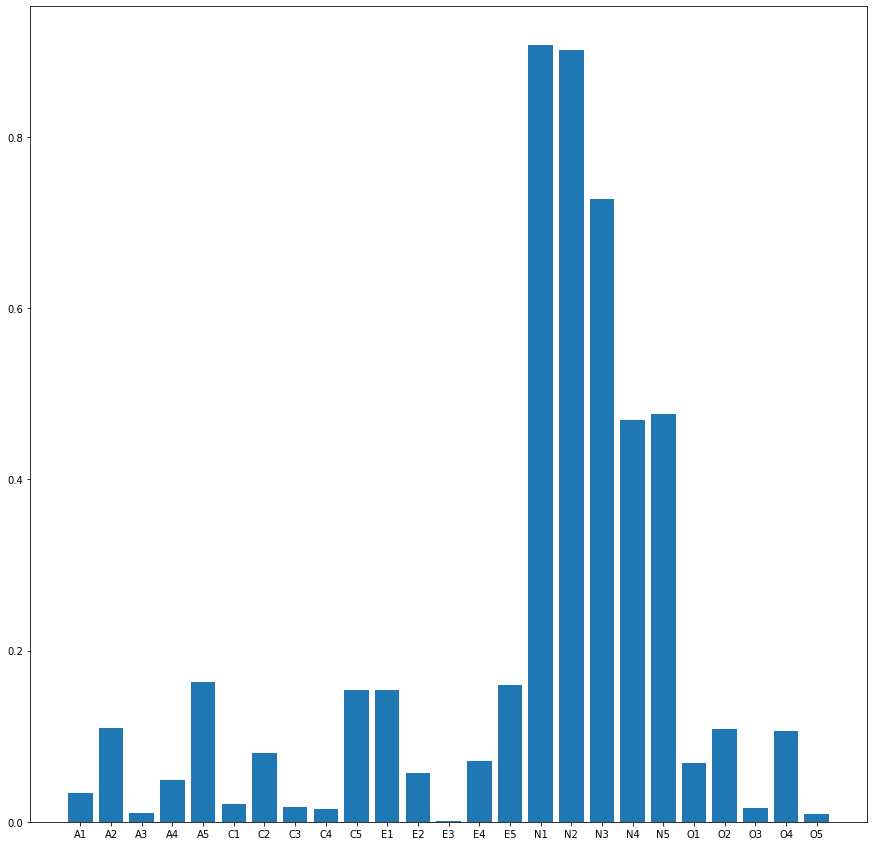

In [66]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped2.columns) 
#range(25) ค่าของข้อมูลทั้งหมด 25 ตัว 
#เป็นการเอา columns แรกในทุกๆแถว นั้นก็คือ .loadings_[:,0] นั้นคือ factor 1 

#Exam 3

ทำ Factor Analysis ข้อมูล Fifa 2018 
https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view?usp=sharing

อันดับแรกเมื่อเรียกข้อมูลมาแล้ว ทำการตัดตาราง ให้เหบือเพียงตัวเลขที่ต้องการใช้งาน 

ตัวเลือก 
  1. นำค่าไปทำ PCA เพื่อดูว่าเราจะหาความสัมพันธ์ของตัวแปรต่างๆ ว่าจะจับกลุ่มกันตามที่เราคิดหรือเปล่า 
  2. หรือเราจะเอามาทำ Factor Analysis เพื่อดูว่าตัวแปรในอธิบายค่าใดได้บ้าง 


In [31]:
FIFA = pd.read_csv('FIFA_2018.csv')
FIFA.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [33]:
#ตัดตารางเอาเฉพาะ ตัวเลขค่า score ต่างๆที่ต้องการใช้งาน 
FIFA_data = FIFA.iloc[:,3:-7]
FIFA_data.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0


ตรวจสอบ Assumption ในการทำ Factor Analysis :

1. there are no outliers in data : ต้องไม่มี outliers เพื่อจะให้ค่าไม่ผิดเพี้ยนไป เราจึงต้องเอาค่าว่างออกไป โดยการใช้ .dropna()

In [34]:
FIFA_data_dropped = FIFA_data.dropna()

2. Sample size should be greater than the factor : จำนวน data ต้องน้อยว่า จำนวน Factor Analysis ใช้ .shape ดูขนาดข้อมูล

In [35]:
FIFA_data.shape

(128, 17)

In [36]:
FIFA_data_dropped.shape

(128, 17)

3. There should not be prefact multicollonearity :เราสามารถดูได้ว่า ถ้า p-value เท่ากับ 0 แสดงว่า data ที่เรามีไม่มี prefact multicollonearity 

In [37]:
chi_square_value,p_value=calculate_bartlett_sphericity(FIFA_data_dropped)
chi_square_value, p_value 
#ดูค่า chi_square และ ค่า p_value

(1299.3697851171412, 2.713580160466225e-189)

4. There should not be homoscedasticity : ทำKaiser-Meyer-Olkin (KMO) Test โดยเมื่อเรารันค่า KMO แล้วมีค่าน้อยกว่า 6 แสดงว่าเราไม่สามารถใช้ข้อมูลนี้ได้ และมีค่าสูง ยิ่งดี 

In [38]:
kmo_all,kmo_model2=calculate_kmo(FIFA_data_dropped)

In [39]:
kmo_model2

0.5594556344508279

จากการทำ Assumption ในการทำ Factor Analysis เราพบว่า เราไม่ควรทำ Factor Analysis ในชุดข้อมูลนี้ เราจึงต้องเตรียมข้อมูลใหม่ โดยกลับไปลดค่าที่มี correlation กันสูงๆออกก่อนจึงนำกลับมาทำใหม่ได้ 

In [40]:
import numpy as np

In [41]:
corr = np.corrcoef(FIFA_data_dropped.to_numpy().T)

In [42]:
corr.shape

(17, 17)

In [43]:
#เรียก corr ที่ทำมาดู
corr

array([[ 1.        ,  0.03475891,  0.14491471,  0.46170195, -0.02037402,
        -0.08707206,  0.04044615,  0.04510519,  0.04681488, -0.11889319,
         0.13568842,  0.04397086,  0.01435519,  0.03033115, -0.04883817,
        -0.03503111, -0.08971381],
       [ 0.03475891,  1.        ,  0.54118512,  0.29723393,  0.36176658,
         0.52150961,  0.54299234,  0.05770557,  0.2738306 , -0.29365763,
         0.71387227,  0.88061086, -0.05905436, -0.29647651, -0.2055111 ,
         0.09092354,  0.02431566],
       [ 0.14491471,  0.54118512,  1.        ,  0.731243  ,  0.71897203,
         0.75430666,  0.68689238, -0.01650799,  0.14085048, -0.26821691,
         0.39761361,  0.58283129,  0.17138088, -0.2487727 , -0.18554427,
        -0.07459404,  0.00979518],
       [ 0.46170195,  0.29723393,  0.731243  ,  1.        ,  0.32467182,
         0.33133261,  0.40757553,  0.07317632,  0.09309032, -0.32155688,
         0.29165918,  0.34809863,  0.06547524, -0.19224194, -0.11525901,
        -0.05174248

In [47]:
#วนลูปหาค่า correlation ที่ซ้ำกัน

for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

#เราไม่สามรถดูค่า corr เพื่อหาค่าที่เป็น 1. ได้เนื่องจากมันเลขตรงแนวทแยงมุม มันต้อง 1. อยู่แล้วเพราะมันค่าเดียวกัน ในลูปเลยเขียนว่าไม่ต้องพิจารณา ถ้าเป็นเลขในแนวทแยงมุม 
#ดังนั้นค่าใน loop จึงไม่มีค่าที่ corr = 1. จริงๆ ทำให้ไม่มีการปริ้นค่าออกมา 

จากการพยายามหาค่า correlation ที่สูง เพื่อตัด columns ออก แล้วจะนำไปใช้ใน Factor Analysis พบว่าในชุดข้อมูล ไม่มี columns ไหนที่เป็น correlation เราจึงใช้ข้อมูลทำ Factor Analysis ต่อ โดยที่มีค่า KMO = 0.59

(เนื่องจากค่ามีน้อยกว่า0.6 จึงเป็นค่าที่ไม่เหมาะสมในการทำเท่าไหร่ ยังสามารถทำได้อยู่ แต่  ถ้าต่ำกว่า 0.5 ถึงทำไม่ได้เลย)

##Start Factors analysis
Choosing the Number of Factors

Import 
```from factor_analyzer import FactorAnalyzer```

In [51]:
#Defind
fa3 = FactorAnalyzer(n_factors=15) #ครอบคลุมค่าทั้งหมดไม่ได้เนื่องจากข้อมูลเยอะไป จึงลดเหลือ factors=15

In [69]:
data_fa3 = fa3.fit_transform(FIFA_data_dropped)
#fit คำนวนพารามิเตอร์ 
#tranfrom เป็นการนำ data ที่คำนวณมาแล้วเข้าไปใส่ในแกนที่ถูกเปลี่ยน

In [70]:
data_fa3.shape

(128, 15)

In [54]:
ev,v = fa3.get_eigenvalues()

In [55]:
ev 

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

ตัดสินว่าเราจะลดเหลือกี่ Dimention (มี factors ทั้งหมดกี่ตัว)

Scree plot เป็นกราฟที่บอกว่า factor แต่ละตัวมี eigenvalues อยู่เท่าไหร่

โดยการทำ Scree plot เพื่อมาดู factor ที่มากว่า 1 แล้วจะนำ factor นั้นมาใช้

In [64]:
matplotlib.rcParams['figure.figsize']=[6,6] #ปรับขนาดกราฟ 

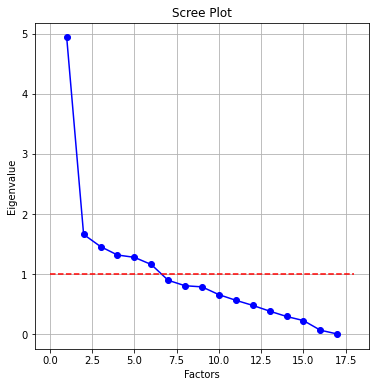

In [65]:
# Create scree plot using matplotlib
plt.plot(range(1,FIFA_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,FIFA_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [71]:
data_fa3[:,:6] #ที่เป็น 6 ตัวเพราะ ตัวที่ 1-6 มีค่ามากกว่า 1

array([[-9.87264718e-01,  5.85214391e-01,  2.88554202e+00,
         1.56007911e+00, -1.32889516e-01,  2.02526239e-01],
       [ 7.69539758e-01, -6.57955412e-01, -1.09700784e+00,
        -6.02790220e-01, -1.97303773e-01,  1.77345748e-01],
       [-5.93367136e-01,  2.04640836e-01, -8.70822110e-01,
        -2.99370826e-01, -4.02323792e-01, -1.44137697e-01],
       [ 7.81571398e-01,  1.83295212e-01, -2.40837404e-01,
        -1.53932622e+00,  5.72105772e-02, -3.18712453e-02],
       [ 8.46713358e-01, -1.32218775e+00, -7.07269735e-01,
         1.55378817e+00, -5.96329009e-01,  7.97477572e-02],
       [-1.41234443e+00, -1.10664565e+00, -1.98143005e-01,
         3.54321582e-01,  2.00428448e+00, -5.94095836e-01],
       [-8.41889574e-01, -4.38529476e-01,  1.14439194e+00,
        -3.08956436e-01,  2.00398356e+00, -6.20291468e-02],
       [ 1.36049369e+00,  6.14514377e-02,  1.26777973e+00,
        -9.59015616e-01,  1.33582270e+00,  1.41153516e-01],
       [ 1.48479148e-01, -3.50683453e-01,  7.466

##Factor Loading

In [68]:
fa3.loadings_.shape

#เป็นการบอกว่ามีกี่ตัวแปร แล้วดูตัวแปรไหนมีอิทธิพลบ้าง

(17, 15)

In [72]:
from factor_analyzer import FactorAnalyzer
fa3 = FactorAnalyzer(n_factors=6)
data_fa3 = fa3.fit_transform(FIFA_data_dropped) 

In [73]:
FIFA_data_dropped.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

Text(0, 0.5, 'Score')

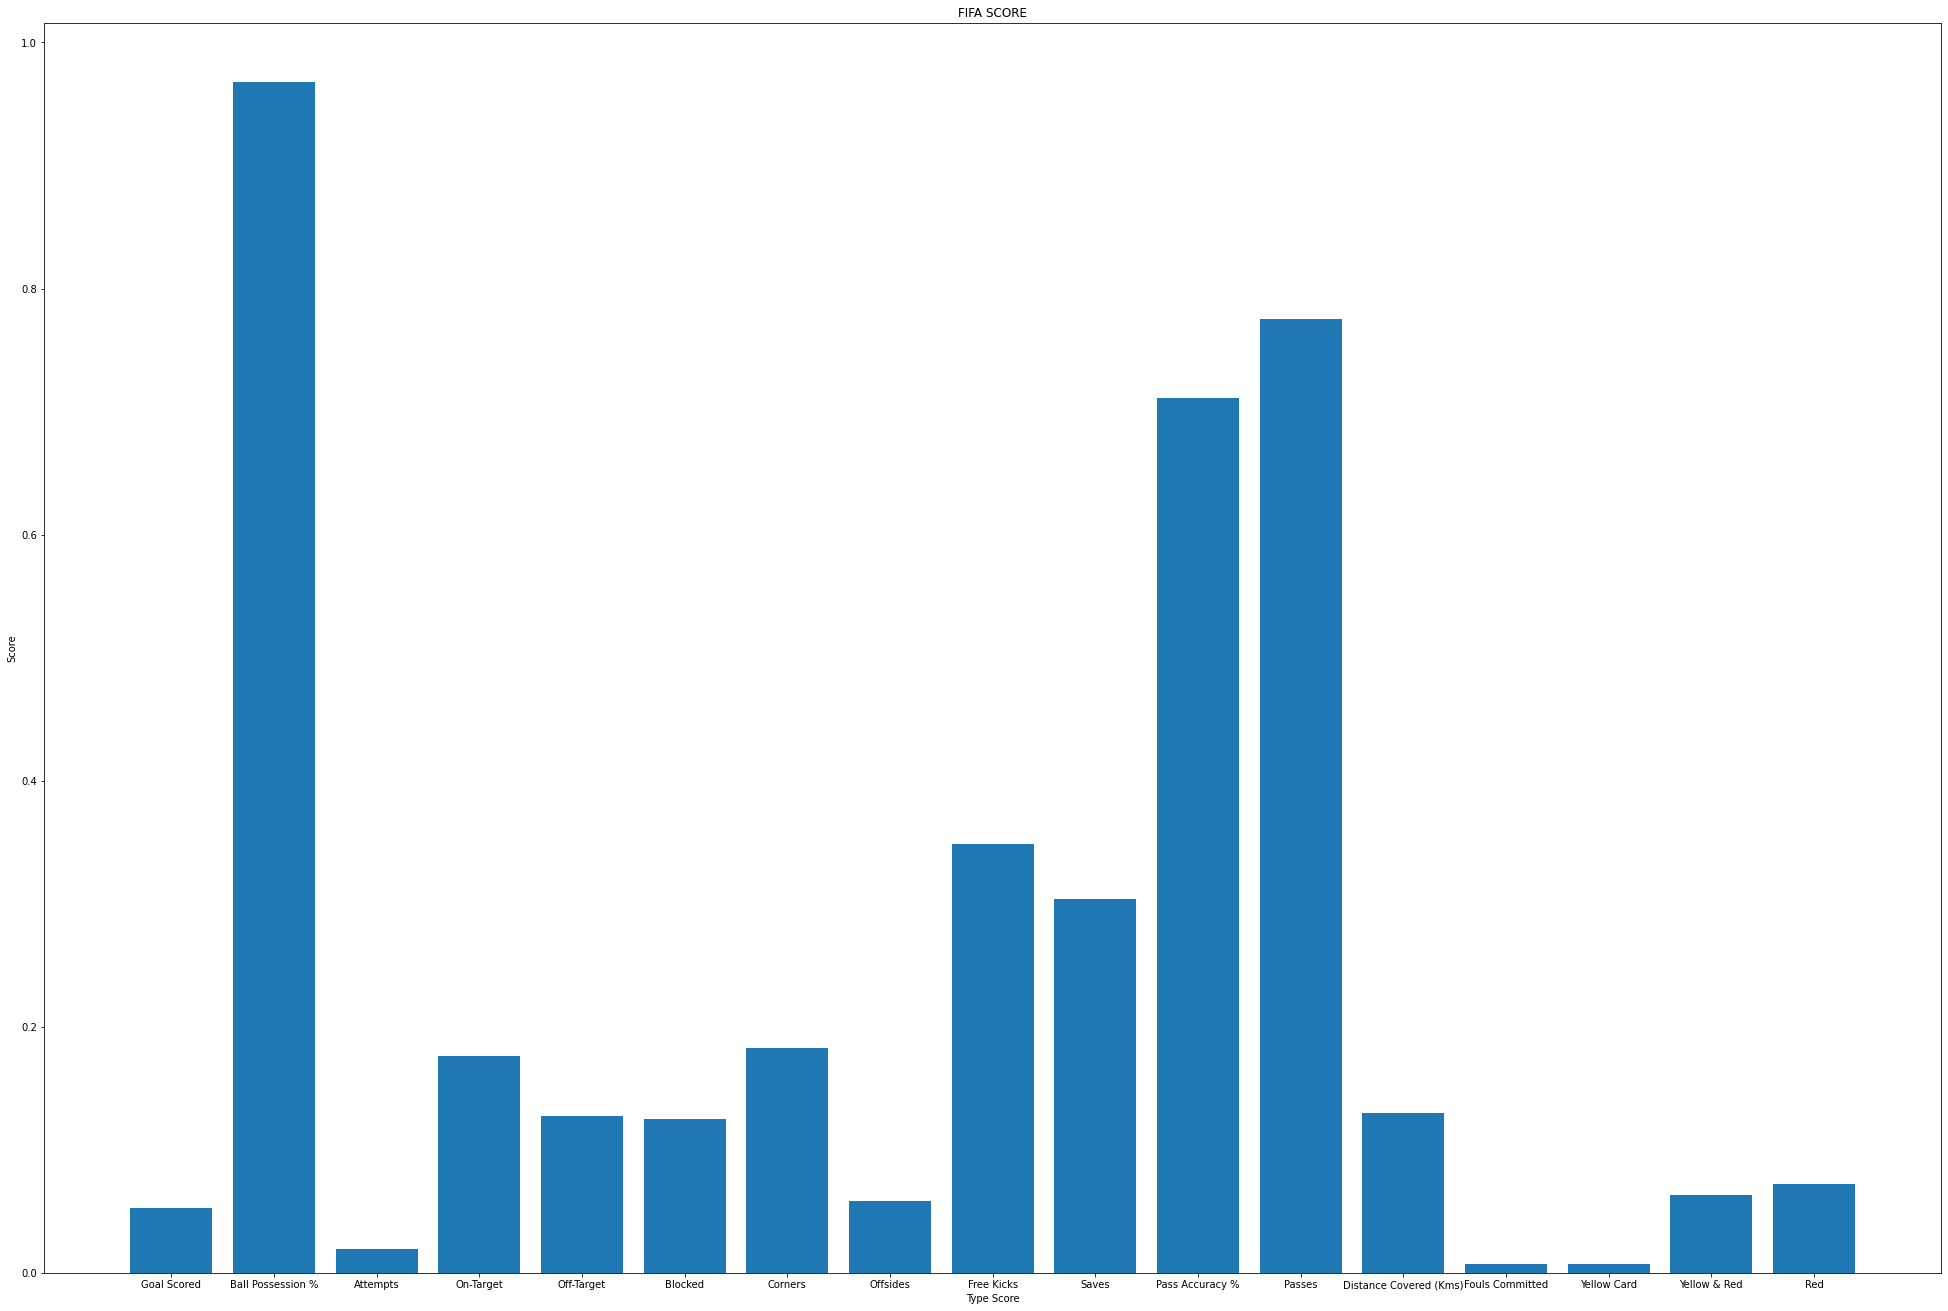

In [95]:
matplotlib.rcParams['figure.figsize']=[34,23]
plt.bar(range(17),np.absolute(fa3.loadings_[:,0]),tick_label=FIFA_data_dropped.columns)
plt.title('FIFA SCORE')
plt.xlabel('Type Score')
plt.ylabel('Score')

##จากกราฟแท่ง FIFA SCORE

พบว่า 
1. On-Target และ Corners จัดอยู่ในกลุ่มเดียวกัน
2. Off-Target และ Blocked จัดอยู่ในกลุ่มเดียวกัน
3. Fouls Committed และ Yellow Card จัดอยู่ในกลุ่มเดียวกัน
4. Offsides และ Yellow & Red จัดอยู่ในกลุ่มเดียวกัน

ส่วน Type Score อื่นๆ ไม่ได้อยู่ในกลุ่มเดียวกับใครเลย คือ

'Goal Scored', 'Ball Possession %', 'Attempts', 'Free Kicks', 'Saves','Pass Accuracy %', 'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Red'